# Project Assignment 3

Please note that project 3 is **assignment week 9 plus a few additional questions.** For your convenience, you can see the exact same questions as in assignment week 9 first. The extra questions are starting from Q20.

## Minimum Spanning Tree

Start with all the assets available in the Investment Funnel for the entire period. Divide this period into half, where the first half is used for training and the second half for testing.

**Q1: Now calculate the Sharpe Ratio for all the assets for the first half (the training set).**

In [2]:
import pandas as pd

In [15]:
data = pd.read_csv("../Project 2/ProjectData.csv", index_col="Date")

data

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-3.413552e-04,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,2.731774e-02,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,6.232342e-02,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-2.080726e-02,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,3.882409e-02,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21 00:00:00+00:00,0.000000e+00,-0.005933,0.001823,-0.007686,0.003066,-0.015878,-0.006619,-0.004069,-0.016322,0.001098,0.002942,-0.149369,-0.093576,0.003192,-0.092242,-0.020690,-0.020646
2021-07-28 00:00:00+00:00,6.724823e-08,0.000000,0.002224,0.018729,-0.004430,0.001034,0.001991,-0.006326,0.012492,0.001296,-0.003098,0.154184,0.102261,0.038146,0.150363,0.005162,-0.006029
2021-08-04 00:00:00+00:00,-6.724823e-08,0.034247,0.001311,0.029251,0.004943,0.030400,0.004925,0.002851,-0.018819,0.000498,0.017194,0.009536,0.001865,-0.005349,-0.040421,0.021622,0.004623


In [16]:
training_set = data[0:252]
test_set = data[252:503]

training_set

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-0.000341,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,0.027318,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,0.062323,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-0.020807,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,0.038824,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,-0.008021,-0.013719,0.000298,0.002630,0.000898,0.012093,0.000933,-0.016323,-0.021756,0.000189,-0.016043,-0.019809,-0.016259,0.010937,-0.018013,-0.011123,-0.000918
2016-10-12 00:00:00+00:00,0.024257,-0.056612,0.000000,-0.010453,0.016159,-0.002012,0.009197,-0.004664,-0.006668,0.000361,-0.008766,-0.031023,-0.018015,0.028101,-0.041013,-0.005743,0.001876
2016-10-19 00:00:00+00:00,-0.000255,-0.022471,0.000000,0.014174,-0.005497,0.013499,-0.012617,0.007518,0.017068,-0.000652,0.026811,0.019936,0.010299,0.037087,0.025722,0.016351,0.012807


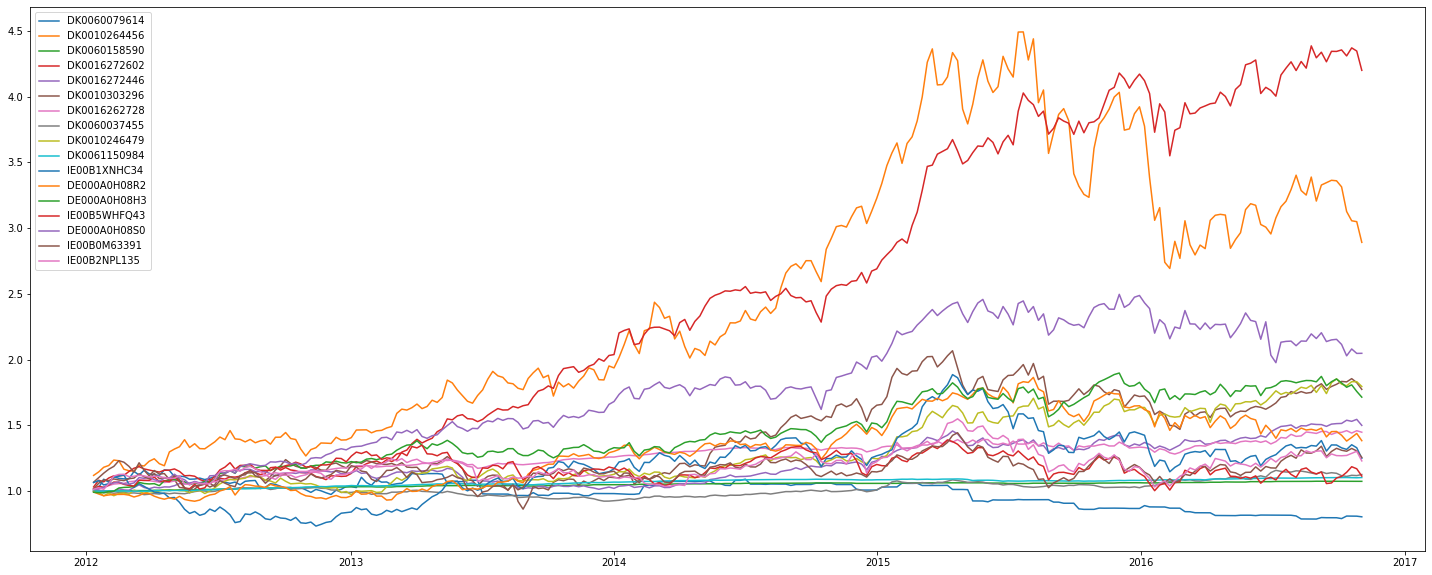

In [50]:
import matplotlib.pyplot as plt, numpy as np
from datetime import datetime

dates = [datetime.strptime(date[:-6], '%Y-%m-%d %H:%M:%S') for date in training_set.index]

plt.figure(figsize=(25,10))



#regne på "nåverdi" av de 100 000 kr
expected_returns = []

for training_data in training_set.columns:
    values = [1+(1*training_set[training_data][0])] #begynne på 0-indeks i asseten
    
    for i in range(len(dates)-1):
        values.append(values[i]+(training_set[training_data][i+1]*values[i])) #går fra indeks 1 til 502 i asset
    expected_returns.append(values)
    plt.plot(dates, values, label=training_data)
    

plt.legend()
plt.show()

In [51]:
returns_training = pd.DataFrame(expected_returns)
returns_training = returns_training.transpose()
returns_training.columns = training_set.columns
returns_training.index = training_set.index

In [52]:
returns_training

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,0.999659,1.119967,1.000000,1.032436,1.013744,1.068514,1.005917,1.008606,0.999692,1.000000,1.066046,0.993672,0.991605,1.017068,1.013658,1.017455,1.014290
2012-01-18 00:00:00+00:00,1.026967,1.146432,1.000000,1.082931,1.004142,1.102695,1.015492,0.998121,0.992227,1.000000,1.080363,0.978713,0.988420,1.037098,1.017984,1.060191,1.026697
2012-01-25 00:00:00+00:00,1.090971,1.181753,1.000000,1.071084,1.003409,1.136877,1.026986,0.987577,0.964713,1.000000,1.047463,0.965096,0.988994,1.029472,1.029030,1.085659,1.014071
2012-02-01 00:00:00+00:00,1.068271,1.195448,1.001872,1.100299,0.994925,1.166918,1.042616,0.991031,0.984824,1.002111,1.056664,0.971122,0.997128,1.045842,1.053145,1.080196,1.056465
2012-02-08 00:00:00+00:00,1.109746,1.236639,1.001872,1.116632,0.999745,1.188526,1.054103,0.984365,0.965453,1.002111,1.107988,0.975563,1.000057,1.069347,1.063356,1.093031,1.115225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.791544,3.314697,1.075947,4.356209,1.515241,1.834868,1.447156,1.117569,1.813994,1.103442,1.329502,1.425328,1.823197,1.112369,2.116250,1.311279,1.269349
2016-10-12 00:00:00+00:00,0.810744,3.127046,1.075947,4.310675,1.539726,1.831177,1.460465,1.112357,1.801898,1.103841,1.317848,1.381111,1.790352,1.143628,2.029456,1.303748,1.271729
2016-10-19 00:00:00+00:00,0.810538,3.056777,1.075947,4.371773,1.531262,1.855897,1.442038,1.120720,1.832654,1.103120,1.353181,1.408644,1.808790,1.186042,2.081658,1.325066,1.288016


In [53]:
from scipy.stats.mstats import gmean

def average_return(return_list):
    return_list = [x+1 for x in return_list]
    
    return gmean(return_list)-1

def annualize_weekly(avg_return_weekly):
    return (1+avg_return_weekly)**52-1

In [61]:
# both annualized

average_returns = [annualize_weekly(average_return(training_set[asset])) for asset in training_set]
stds = [np.std(training_set[asset])*np.sqrt(52) for asset in training_set]

In [62]:
asset_info = [list(asset_info) for asset_info in zip(average_returns, stds)]

info_df = pd.DataFrame(asset_info).T
info_df.columns = training_set.columns
info_df.index = ["Average return", "Standard deviation"]


info_df

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Average return,-0.043782,0.245039,0.015010,0.344702,0.087340,0.125599,0.079441,0.024902,0.128490,0.020571,0.047119,0.069358,0.117752,0.022710,0.159497,0.048325,0.043694
Standard deviation,0.127753,0.283771,0.007383,0.164170,0.102106,0.226815,0.063989,0.049646,0.157294,0.010201,0.234882,0.184875,0.145073,0.196608,0.183370,0.192505,0.186516


In [63]:
def calculate_sharpe(expected_return, expected_std, risk_free_return=0):
    return (expected_return-risk_free_return)/expected_std

In [66]:
# info_df[asset][0] = avg return
# info_df[asset][1] = std

sharpe_ratio_list = [calculate_sharpe(info_df[asset][0], info_df[asset][1]) 
               for asset in info_df]

In [67]:
asset_info = [list(asset_info) for asset_info in zip(average_returns, stds, sharpe_ratio_list)]

info_df = pd.DataFrame(asset_info).T
info_df.columns = training_set.columns
info_df.index = ["Average return", "Standard deviation", "Sharpe Ratio"]


info_df

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Average return,-0.043782,0.245039,0.015010,0.344702,0.087340,0.125599,0.079441,0.024902,0.128490,0.020571,0.047119,0.069358,0.117752,0.022710,0.159497,0.048325,0.043694
Standard deviation,0.127753,0.283771,0.007383,0.164170,0.102106,0.226815,0.063989,0.049646,0.157294,0.010201,0.234882,0.184875,0.145073,0.196608,0.183370,0.192505,0.186516
Sharpe Ratio,-0.342708,0.863508,2.032982,2.099668,0.855390,0.553750,1.241484,0.501605,0.816878,2.016647,0.200605,0.375161,0.811668,0.115506,0.869811,0.251031,0.234262


In [69]:
info_df = info_df.T

In [70]:
info_df

,Average return,Standard deviation,Sharpe Ratio
DK0060079614,-0.043782,0.127753,-0.342708
DK0010264456,0.245039,0.283771,0.863508
DK0060158590,0.015010,0.007383,2.032982
DK0016272602,0.344702,0.164170,2.099668
DK0016272446,0.087340,0.102106,0.855390
DK0010303296,0.125599,0.226815,0.553750
DK0016262728,0.079441,0.063989,1.241484
DK0060037455,0.024902,0.049646,0.501605
DK0010246479,0.128490,0.157294,0.816878
DK0061150984,0.020571,0.010201,2.016647


### Strategy 1

**Q2: Pick up the top 4-5 assets with the highest Sharpe Ratios for the training set.**

In [71]:
info_df['Sharpe Ratio'].nlargest(n=5)

DK0016272602    2.099668
DK0060158590    2.032982
DK0061150984    2.016647
DK0016262728    1.241484
DE000A0H08S0    0.869811
Name: Sharpe Ratio, dtype: float64

**Q3: Calculate the covariance matrix for these assets.**

In [74]:
top_5 =  training_set[['DK0016272602', 'DK0060158590', 'DK0061150984', 'DK0016262728', 'DE000A0H08S0']]

top_5.cov()

,DK0016272602,DK0060158590,DK0061150984,DK0016262728,DE000A0H08S0
DK0016272602,5.203678e-04,9.086210e-07,7.368816e-07,7.573305e-05,3.656171e-04
DK0060158590,9.086210e-07,1.052555e-06,4.122238e-07,6.808681e-07,7.932011e-07
DK0061150984,7.368816e-07,4.122238e-07,2.009006e-06,1.811010e-06,1.054700e-06
DK0016262728,7.573305e-05,6.808681e-07,1.811010e-06,7.905595e-05,8.343702e-05
DE000A0H08S0,3.656171e-04,7.932011e-07,1.054700e-06,8.343702e-05,6.492000e-04


**Q4: Make an equal weight portfolio of these assets and test their performance on your testing data now.**

## Strategy 2

**Q5: Pick up the top 200 assets with the highest Sharpe Ratios for the training set.**

**Q6: Run the Minimum Spanning Tree method on this set a number of times until you have only about 4-5 assets left.**

**Q7: Calculate the covariance matrix for these assets now and compare with the covariancematrix from strategy 1.** 

**Q8: Make an equal weight portfolio of these assets and test their performance on yourtesting data now.**

Compare the performance of the two strategies:

**Q9: Calculate average return, std for the two strategies and compare.**


**Q10: Calculate and compare the Sharpe ratio for the two strategies.**

**Q11: Calculate and compare maximum drawdown for the two strategies**

## Hierarchical clustering

### Strategy 3

Continue now with the top 200 assets with the highest Sharpe Ratios for the training set.

**Q12: Run the Hierarchical Clustering method on this set to make three clusters.**


**Q13: Pick the asset with the highest Sharpe ratio from the two smaller clusters.**


**Q14: Run the Minimum Spanning Three method on the biggest cluster a number of times until you are left with 3-4 assets only.**


**Q15: Calculate the covariance matrix for these assets now and compare with the covariance matrix from strategy 1 and 2.**


**Q16: Make an equal weight portfolio of these assets and test their performance on your testing data now.**

Compare the performance of the two strategies:

**Q17: Calculate average return, std for the two strategies and compare.** 



**Q18: Calculate and compare the Sharpe ratio for the two strategies.** 

**Q19: Calculate and compare maximum drawdown for the two strategies.**

## Extra questions

The starting point for these questions are the 4-5 assets that you have picked for your portfolios in strategy 2 and 3. So in total you should perform the following statistical analysis for each of these 8-10 assets.

**Q20: Draw histograms of returns for each of the assets.**


**Q21: Draw density function of returns for each of the assets.**


**Q22: Draw QQ-Plots of returns for each of the assets.**


**Q23: Perform a Jarque-Bera test for normality of return distributions for each of the assets. Q24: Measure and report skewness of returns for each of the assets.**


**Q25: Measure and report kurtosis of returns for each of the assets.**


**Q26: For each of the assets, decide and report whether you can accept the return as being normally distributed.**